## Observations and Insights 

In [255]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# Display the data table for preview
mouse_results


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [20]:
# Checking the number of mice.
total_mice = mouse_results.nunique()['Mouse ID']

total_mice



249

In [262]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_results['Duplicated'] = mouse_results.duplicated(subset=['Mouse ID','Timepoint'])

duplicated_mice = mouse_results[mouse_results['Duplicated']==True] 
duplicated_mice[['Mouse ID','Timepoint']] #showing only the duplicated mice by their ID and Timepoint



,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [257]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicated
909,g989,Propriva,Female,21,26,0,45.000000,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [263]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mice = mouse_results[mouse_results['Mouse ID'].isin(duplicated_mice)==False] #dropping the duplicates
cleaned_mice.reset_index(drop= True, inplace=True) #reset the index without having the index in the column

cleaned_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicated
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,False


In [266]:
# Checking the number of mice in the clean DataFrame.
cleaned_total = len(cleaned_mice['Mouse ID'].unique())
cleaned_total

249

## Summary Statistics

In [267]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean = cleaned_mice.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
tumor_median = cleaned_mice.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
tumor_var = cleaned_mice.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
tumor_sd = cleaned_mice.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
tumor_sem = cleaned_mice.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
trail_count = cleaned_mice.groupby(['Drug Regimen'])['Mouse ID'].count()

# This method is the most straighforward, creating multiple series and putting them all together at the end.
tumor_stats_df = pd.DataFrame({'Trail Count': trail_count, 'Tumor Mean': tumor_mean, 'Tumor Median': tumor_median,'Tumor Variance': tumor_var, 
                               'Tumor Std Dev': tumor_sd, 'SEM of Tumor': tumor_sem})

tumor_stats_df

,Trail Count,Tumor Mean,Tumor Median,Tumor Variance,Tumor Std Dev,SEM of Tumor
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,161,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


In [268]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# mice_data = cleaned_mice.groupby(['Drug Regimen'])['Tumor Volume (mm3)']
# mean_tumor = np.mean(mice_data)
# print(mean_tumor)

# This method produces everything in a single groupby function
cleaned_mice.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].describe(include='all')


,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,161.0,52.322552,6.507770,45.000000,47.081086,50.854632,56.184664,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

<AxesSubplot:title={'center':'Total number of Mice for each treatment'}, xlabel='Drug Regimen', ylabel='Trail Count'>

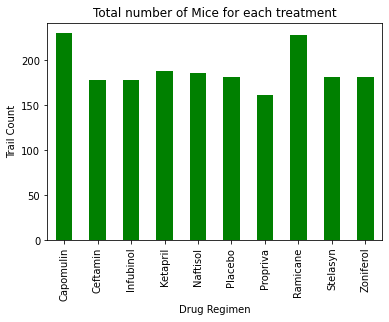

In [269]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_treatment = tumor_stats_df[['Trail Count']]
mice_treatment.plot(kind='bar', title='Total number of Mice for each treatment', 
                    color='green',width=0.5, ylabel="Trail Count",legend=False )


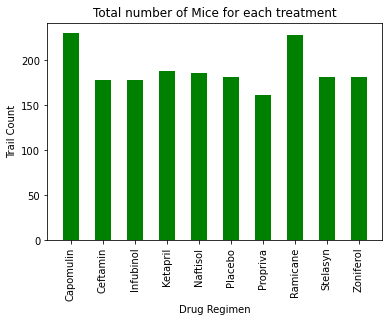

In [270]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

type_of_drugs = tumor_stats_df.index
trial_count = tumor_stats_df['Trail Count']
plt.title('Total number of Mice for each treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Trail Count')
plt.bar(type_of_drugs, trail_count, color='green', width=0.5)
tick_locations = [value for value in type_of_drugs]
plt.xticks(tick_locations, rotation= 90)

plt.show()


<AxesSubplot:title={'center':'Gender Distribution'}>

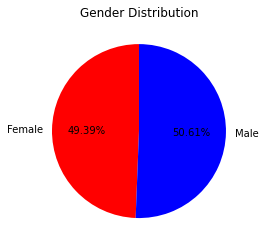

In [271]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gend = cleaned_mice.groupby(['Sex'])['Mouse ID'].count()
mice_gend.plot(kind='pie',colors=['red','blue'], startangle=90, autopct = "%.2f%%", ylabel='', title='Gender Distribution')


Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64

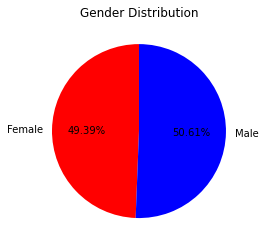

In [273]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice_gender = cleaned_mice.groupby(['Sex'])['Mouse ID'].count()
labels = ['Female', 'Male']
colors = ['red','blue']

plt.pie(mice_gender, labels=labels, colors=colors,
        autopct="%.2f%%", shadow=False, startangle=90)
plt.title('Gender Distribution')

mice_gender

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
